In [19]:
#Get the libraries

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [20]:
#Get the data
churn_df = pd.read_csv("churn.csv")
churn_df = churn_df.drop(columns="PaymentMethod")
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,Yes


In [21]:
#Remove customer ID
churn_df = churn_df.loc[:, 'gender':'Churn']
churn_df.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(16)
memory usage: 1.0+ MB


In [22]:
#Replace " " with nan and drop none values
churn_df['TotalCharges'].replace(' ', np.nan, inplace=True)
churn_df.dropna(subset=['TotalCharges'], inplace=True)

churn_df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.5,No


In [23]:
#Change Total Charges to Numeric Values
churn_df["TotalCharges"] = pd.to_numeric(churn_df["TotalCharges"])

In [24]:
#Preprocessing
X = churn_df.loc[:, 'gender':'TotalCharges'].values
X[0:5]

array([['Female', 0, 'Yes', 'No', 1, 'No', 'No phone service', 'DSL',
        'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes',
        29.85, 29.85],
       ['Male', 0, 'No', 'No', 34, 'Yes', 'No', 'DSL', 'Yes', 'No',
        'Yes', 'No', 'No', 'No', 'One year', 'No', 56.95, 1889.5],
       ['Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No',
        'No', 'No', 'No', 'Month-to-month', 'Yes', 53.85, 108.15],
       ['Male', 0, 'No', 'No', 45, 'No', 'No phone service', 'DSL',
        'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 42.3,
        1840.75],
       ['Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No',
        'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 70.7,
        151.65]], dtype=object)

In [25]:
from sklearn import preprocessing

_gender = preprocessing.LabelEncoder()
_gender.fit(['Female','Male'])
X[:,0] = _gender.transform(X[:,0]) 

#Partner
_partner = preprocessing.LabelEncoder()
_partner.fit(['Yes', 'No'])
X[:,2] = _partner.transform(X[:,2])

#Dependents
_dependents = preprocessing.LabelEncoder()
_dependents.fit(['Yes', 'No'])
X[:,3] = _dependents.transform(X[:,3])

#PhoneService
_pservice = preprocessing.LabelEncoder()
_pservice.fit(['Yes', 'No'])
X[:,5] = _pservice.transform(X[:,5]) 

#Multilines
_multilines = preprocessing.LabelEncoder()
_multilines.fit(['Yes', 'No', 'No phone service'])
X[:,6] = _multilines.transform(X[:,6]) 

#Internet service
_is = preprocessing.LabelEncoder()
_is.fit(['DSL', 'Fiber optic', 'No'])
X[:,7] = _is.transform(X[:,7]) 

#Online security
_onlinesec = preprocessing.LabelEncoder()
_onlinesec.fit(['Yes', 'No', 'No internet service'])
X[:,8] = _onlinesec.transform(X[:,8])

#Online Backup
_onlinebac = preprocessing.LabelEncoder()
_onlinebac.fit(['Yes', 'No', 'No internet service'])
X[:,9] = _onlinebac.transform(X[:,9]) 

#Device protection
_dp = preprocessing.LabelEncoder()
_dp.fit(['Yes', 'No', 'No internet service'])
X[:,10] = _dp.transform(X[:,10])

#Tech support
_ts = preprocessing.LabelEncoder()
_ts.fit(['Yes', 'No', 'No internet service'])
X[:,11] = _ts.transform(X[:,11]) 

#StreamingTv
_st = preprocessing.LabelEncoder()
_st.fit(['Yes', 'No', 'No internet service'])
X[:,12] = _st.transform(X[:,12])

#StreamingMovies
_sm = preprocessing.LabelEncoder()
_sm.fit(['Yes', 'No', 'No internet service'])
X[:,13] = _sm.transform(X[:,13])

#Contract
_contract = preprocessing.LabelEncoder()
_contract.fit(['Month-to-month', 'One year', 'Two year'])
X[:,14] = _contract.transform(X[:,14])

#Paperless billing
_pb = preprocessing.LabelEncoder()
_pb.fit(['Yes','No'])
X[:,15] = _pb.transform(X[:,15])


X[0:1]

array([[0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 29.85, 29.85]],
      dtype=object)

In [26]:
#Churn
#Todo

_churn = churn_df['Churn'].values

_churn

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [27]:
#Churn
_c = preprocessing.LabelEncoder()
_c.fit(['Yes','No'])
_churn = _c.transform(_churn)

_churn[0:5]

array([0, 0, 1, 0, 1])

In [28]:
#y
y = _churn

### Nomralise Data

In [29]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.00943013, -0.44032709,  1.03561683, -0.65230493, -1.28024804,
        -3.05633383,  0.0626661 , -1.18361379, -0.91783746,  1.24287458,
        -1.02698755, -0.92426659, -1.11263165, -1.12150139, -0.82673477,
         0.82893915, -1.16169394, -0.99419409],
       [ 0.99065797, -0.44032709, -0.9656081 , -0.65230493,  0.06430269,
         0.32718939, -0.99156363, -1.18361379,  1.40801227, -1.02899806,
         1.24544054, -0.92426659, -1.11263165, -1.12150139,  0.37392589,
        -1.20636117, -0.26087792, -0.17373982],
       [ 0.99065797, -0.44032709, -0.9656081 , -0.65230493, -1.23950408,
         0.32718939, -0.99156363, -1.18361379,  1.40801227,  1.24287458,
        -1.02698755, -0.92426659, -1.11263165, -1.12150139, -0.82673477,
         0.82893915, -0.36392329, -0.95964911],
       [ 0.99065797, -0.44032709, -0.9656081 , -0.65230493,  0.51248626,
        -3.05633383,  0.0626661 , -1.18361379,  1.40801227, -1.02899806,
         1.24544054,  1.39696293, -1.11263165, -1.121

### Train Test SPlit

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5625, 18) (5625,)
Test set: (1407, 18) (1407,)


In [31]:
## Model
# C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
#Predict
y_hat = LR.predict(X_test)
y_hat

array([0, 0, 0, ..., 0, 1, 1])

### predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [33]:
y_hat_prob = LR.predict_proba(X_test)
y_hat_prob

array([[0.91158372, 0.08841628],
       [0.67617743, 0.32382257],
       [0.93971722, 0.06028278],
       ...,
       [0.9714284 , 0.0285716 ],
       [0.45673472, 0.54326528],
       [0.40276479, 0.59723521]])

### Evaluation

#### jaccard index

##### Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [34]:
from sklearn.metrics import jaccard_similarity_score
print("Jaccard index: ", jaccard_similarity_score(y_test, y_hat))

Jaccard index:  0.8009950248756219


### Confusion Matrix

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_hat, labels=[1,0]))

[[207 168]
 [112 920]]


Confusion matrix, without normalization
[[207 168]
 [112 920]]


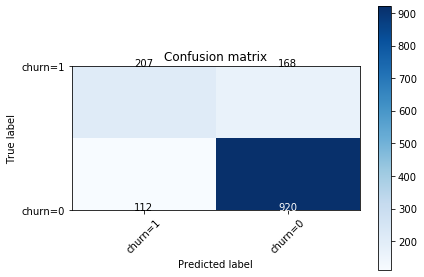

In [36]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [38]:
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1032
           1       0.65      0.55      0.60       375

   micro avg       0.80      0.80      0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



###
Based on the count of each section, we can calculate precision and recall of each label:

Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

Recall is true positive rate. It is defined as: Recall = TP / (TP + FN)

So, we can calculate precision and recall of each class.

F1 score: Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.80 in our case.

In [41]:
from sklearn.metrics import log_loss
print("log loss", log_loss(y_test, y_hat_prob))

log loss 0.42256203935928854


### Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.